# Assignment 1

In [1]:
#import required libraries like pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from numpy import mean
from numpy import std

In [2]:
#read the train data into dataframe
dengue_train = pd.read_csv("dengue_features_train.csv") 

In [3]:
#view first 3 rows of the dataframe
dengue_train.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


In [4]:
#display a quick overview of the dataset
dengue_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [5]:
#display number of rows and columns in the dataframe
dengue_train.shape

(1456, 24)

In [6]:
#display names of the columns in the dataframe
dengue_train.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

#### 1. Renaming the column names

a). Rename columns which have 'station' such that 'station' is abbreviated to 'stn' 

In [7]:
dengue_train.columns = dengue_train.columns.str.replace("station","stn")

b). Rename columns which have 'reanalysis' to abbreviate 're_an'

In [8]:
dengue_train.columns = dengue_train.columns.str.replace("reanalysis","re_an")

c). Rename columns which have 'humidity' to abbreviate to 'hd'

In [9]:
dengue_train.columns = dengue_train.columns.str.replace("humidity","hd")

d). Abbreviate 'precipitation' part of column name to 'prec'

In [10]:
dengue_train.columns = dengue_train.columns.str.replace("precipitation","prec")

 e). View top 3 rows and recheck if column name changes have taken effect 

In [11]:
dengue_train.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


f). Check the type of columns in dataframe

In [12]:
print(type(dengue_train.columns)) #display the type of the column

<class 'pandas.core.indexes.base.Index'>


In [13]:
 dengue_train.dtypes  #display the datatypes for each column

city                           object
year                            int64
weekofyear                      int64
week_start_date                object
ndvi_ne                       float64
ndvi_nw                       float64
ndvi_se                       float64
ndvi_sw                       float64
prec_amt_mm                   float64
re_an_air_temp_k              float64
re_an_avg_temp_k              float64
re_an_dew_point_temp_k        float64
re_an_max_air_temp_k          float64
re_an_min_air_temp_k          float64
re_an_precip_amt_kg_per_m2    float64
re_an_relative_hd_percent     float64
re_an_sat_precip_amt_mm       float64
re_an_specific_hd_g_per_kg    float64
re_an_tdtr_k                  float64
stn_avg_temp_c                float64
stn_diur_temp_rng_c           float64
stn_max_temp_c                float64
stn_min_temp_c                float64
stn_precip_mm                 float64
dtype: object

g). Change the column 'year' as categorical variable

In [14]:
dengue_train.year = dengue_train.year.astype("category")  #change the datatype of year column to categorical

In [15]:
dengue_train["year"].dtypes 

CategoricalDtype(categories=[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                  2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                  2010],
                 ordered=False)

In [16]:
#read the dengue_labels_train dataset into another dataframe
dengue_labels = pd.read_csv("dengue_labels_train.csv")  
dengue_labels.head()


,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [17]:
#dengue_labels.dtypes

In [18]:
#merge the above two dataframes on city, year and weekofyear and store it into new dataframe
merged_train_labels = pd.merge(dengue_train,dengue_labels, on= ["city",'year','weekofyear'])
print(merged_train_labels.head(3))
print(merged_train_labels.shape)

  city  year  weekofyear week_start_date  ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.12260  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.16990  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.03225  0.172967  0.157200   

    ndvi_sw  prec_amt_mm  re_an_air_temp_k  ...  re_an_relative_hd_percent  \
0  0.177617        12.42        297.572857  ...                  73.365714   
1  0.155486        22.82        298.211429  ...                  77.368571   
2  0.170843        34.54        298.781429  ...                  82.052857   

   re_an_sat_precip_amt_mm  re_an_specific_hd_g_per_kg  re_an_tdtr_k  \
0                    12.42                   14.012857      2.628571   
1                    22.82                   15.372857      2.371429   
2                    34.54                   16.848571      2.300000   

   stn_avg_temp_c  stn_diur_temp_rng_c  stn_max_temp_c  stn_min_temp_c  \
0       25.442857             6

In [19]:
#display the count of null values for each attribute
merged_train_labels.isna().sum()

city                            0
year                            0
weekofyear                      0
week_start_date                 0
ndvi_ne                       194
ndvi_nw                        52
ndvi_se                        22
ndvi_sw                        22
prec_amt_mm                    13
re_an_air_temp_k               10
re_an_avg_temp_k               10
re_an_dew_point_temp_k         10
re_an_max_air_temp_k           10
re_an_min_air_temp_k           10
re_an_precip_amt_kg_per_m2     10
re_an_relative_hd_percent      10
re_an_sat_precip_amt_mm        13
re_an_specific_hd_g_per_kg     10
re_an_tdtr_k                   10
stn_avg_temp_c                 43
stn_diur_temp_rng_c            43
stn_max_temp_c                 20
stn_min_temp_c                 14
stn_precip_mm                  22
total_cases                     0
dtype: int64

We can see that there are missing values for several attributes, let's try handle them -

In [20]:
#fill the null  values using forward fill method
merged_train_labels = merged_train_labels.fillna(method="ffill")

In [21]:
merged_train_labels.isna().sum()

city                          0
year                          0
weekofyear                    0
week_start_date               0
ndvi_ne                       0
ndvi_nw                       0
ndvi_se                       0
ndvi_sw                       0
prec_amt_mm                   0
re_an_air_temp_k              0
re_an_avg_temp_k              0
re_an_dew_point_temp_k        0
re_an_max_air_temp_k          0
re_an_min_air_temp_k          0
re_an_precip_amt_kg_per_m2    0
re_an_relative_hd_percent     0
re_an_sat_precip_amt_mm       0
re_an_specific_hd_g_per_kg    0
re_an_tdtr_k                  0
stn_avg_temp_c                0
stn_diur_temp_rng_c           0
stn_max_temp_c                0
stn_min_temp_c                0
stn_precip_mm                 0
total_cases                   0
dtype: int64

**Now, there are no null values in the merged_train_label dataset**

2.a). Do a random check by printing few values from both files and merged file

In [22]:
#random check for few values from both the dataset and the merged dataset
#dengue_train.iloc[4]

dengue_train.sample()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
715,sj,2004,5,2004-01-29,-0.0535,-0.108,0.236257,0.280414,0.0,297.56,...,2.0,75.422857,0.0,14.39,2.457143,24.628571,6.2,28.9,20.0,1.8


In [23]:
dengue_labels.iloc[133]

city             sj
year           1992
weekofyear       47
total_cases      47
Name: 133, dtype: object

In [24]:
merged_train_labels.iloc[133]

city                                  sj
year                                1992
weekofyear                            47
week_start_date               1992-11-18
ndvi_ne                           0.0764
ndvi_nw                        0.0561333
ndvi_se                         0.134371
ndvi_sw                        0.0640143
prec_amt_mm                        43.44
re_an_air_temp_k                 298.343
re_an_avg_temp_k                 298.286
re_an_dew_point_temp_k           294.653
re_an_max_air_temp_k               300.6
re_an_min_air_temp_k               296.6
re_an_precip_amt_kg_per_m2         49.97
re_an_relative_hd_percent        80.2557
re_an_sat_precip_amt_mm            43.44
re_an_specific_hd_g_per_kg       16.0671
re_an_tdtr_k                     1.82857
stn_avg_temp_c                   26.6857
stn_diur_temp_rng_c                    7
stn_max_temp_c                      31.1
stn_min_temp_c                      22.2
stn_precip_mm                       26.1
total_cases     

In [25]:
dengue_train.iloc[880]

city                                  sj
year                                2007
weekofyear                            14
week_start_date               2007-04-02
ndvi_ne                        0.0188667
ndvi_nw                          0.03325
ndvi_se                         0.187057
ndvi_sw                         0.163843
prec_amt_mm                        90.68
re_an_air_temp_k                 297.777
re_an_avg_temp_k                 297.864
re_an_dew_point_temp_k            293.27
re_an_max_air_temp_k               299.9
re_an_min_air_temp_k               296.5
re_an_precip_amt_kg_per_m2          36.3
re_an_relative_hd_percent        76.2143
re_an_sat_precip_amt_mm            90.68
re_an_specific_hd_g_per_kg       14.7729
re_an_tdtr_k                     2.07143
stn_avg_temp_c                      25.6
stn_diur_temp_rng_c              6.01429
stn_max_temp_c                        30
stn_min_temp_c                      21.7
stn_precip_mm                       40.2
Name: 880, dtype

In [26]:
dengue_labels.iloc[880]

city             sj
year           2007
weekofyear       14
total_cases       3
Name: 880, dtype: object

In [27]:
merged_train_labels.iloc[880]

city                                  sj
year                                2007
weekofyear                            14
week_start_date               2007-04-02
ndvi_ne                        0.0188667
ndvi_nw                          0.03325
ndvi_se                         0.187057
ndvi_sw                         0.163843
prec_amt_mm                        90.68
re_an_air_temp_k                 297.777
re_an_avg_temp_k                 297.864
re_an_dew_point_temp_k            293.27
re_an_max_air_temp_k               299.9
re_an_min_air_temp_k               296.5
re_an_precip_amt_kg_per_m2          36.3
re_an_relative_hd_percent        76.2143
re_an_sat_precip_amt_mm            90.68
re_an_specific_hd_g_per_kg       14.7729
re_an_tdtr_k                     2.07143
stn_avg_temp_c                      25.6
stn_diur_temp_rng_c              6.01429
stn_max_temp_c                        30
stn_min_temp_c                      21.7
stn_precip_mm                       40.2
total_cases     

2.b). Do a scatter plot of weekofyear on x-axis and total_cases on y-axis and observe if there is a relationship.

city
iq    AxesSubplot(0.125,0.125;0.775x0.755)
sj    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

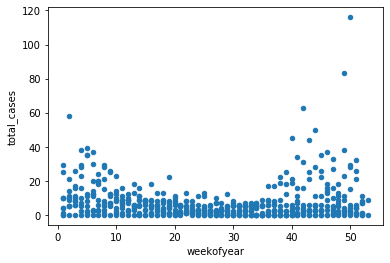

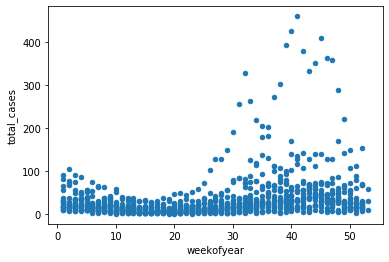

In [28]:
#scatter plot between weekofyear and total_case grouped by city
city_group = merged_train_labels.groupby("city")
city_group.plot(x ="weekofyear", y= "total_cases",kind="scatter")


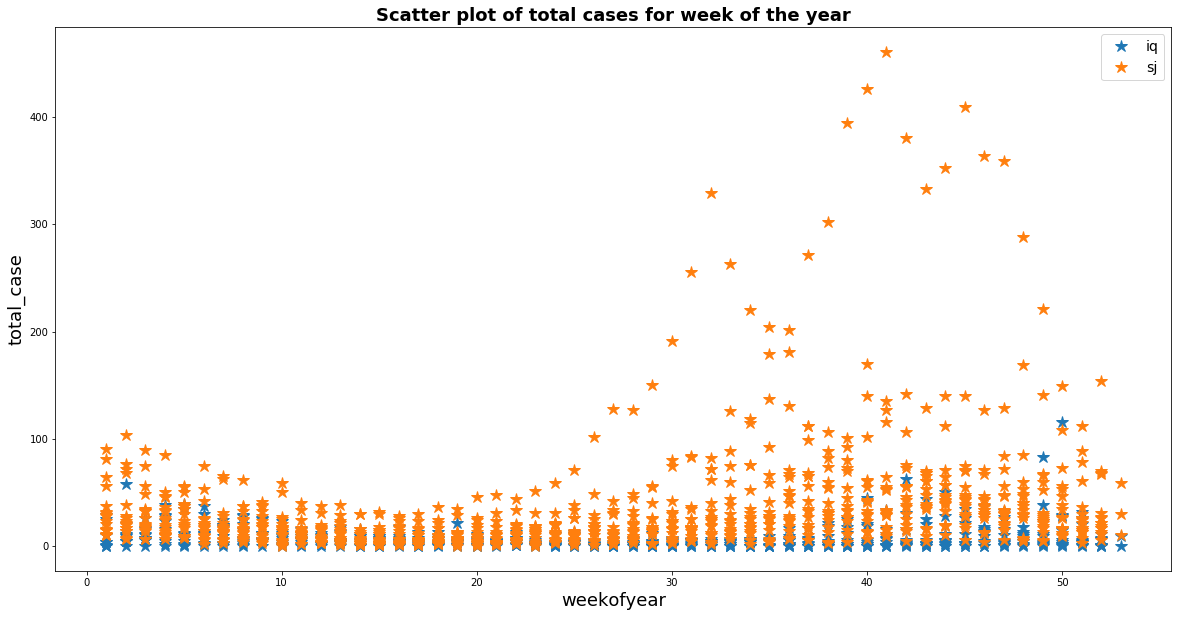

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
ax.margins(0.05)
for name, group in city_group:
    ax.plot(group.weekofyear, group.total_cases, marker='*', linestyle='', ms=12, label=name)
ax.legend(loc=1, prop={'size': 14})
plt.xlabel("weekofyear", fontsize=18)
plt.ylabel("total_case", fontsize = 18)
plt.title("Scatter plot of total cases for week of the year", fontsize=18,fontweight="bold")
plt.show()

From the above two plots,we can say that

* There are more number of dengue cases during starting few weeks of the year and then lesser cases for weeks between 10 and 25 for San Juan and weeks 10 and 30 for Iquitos followed with increase in number of cases in later weeks of several years for both the cities.
* There are more total_cases of dengue in San Juan than Iquitos.

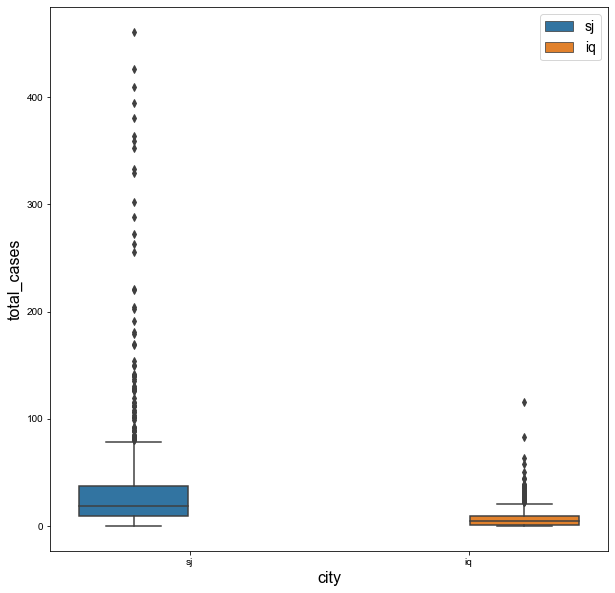

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(x="city", y="total_cases",data=merged_train_labels,hue="city",ax=ax)
ax.set_xlabel("city", fontsize = 16)
ax.set_ylabel("total_cases", fontsize = 16)
ax.legend(fontsize=14)
sns.set(font_scale = 2)

According to the distribution of total_case in two cities, it can be inferred that 
* The distribution of total_cases for san juan is right-skewed while it seems to be symmetric for iquitos.
* There are several outliers for both the cities. 
* There is more variability in data points of total_cases for city San Juan than Iquitos.

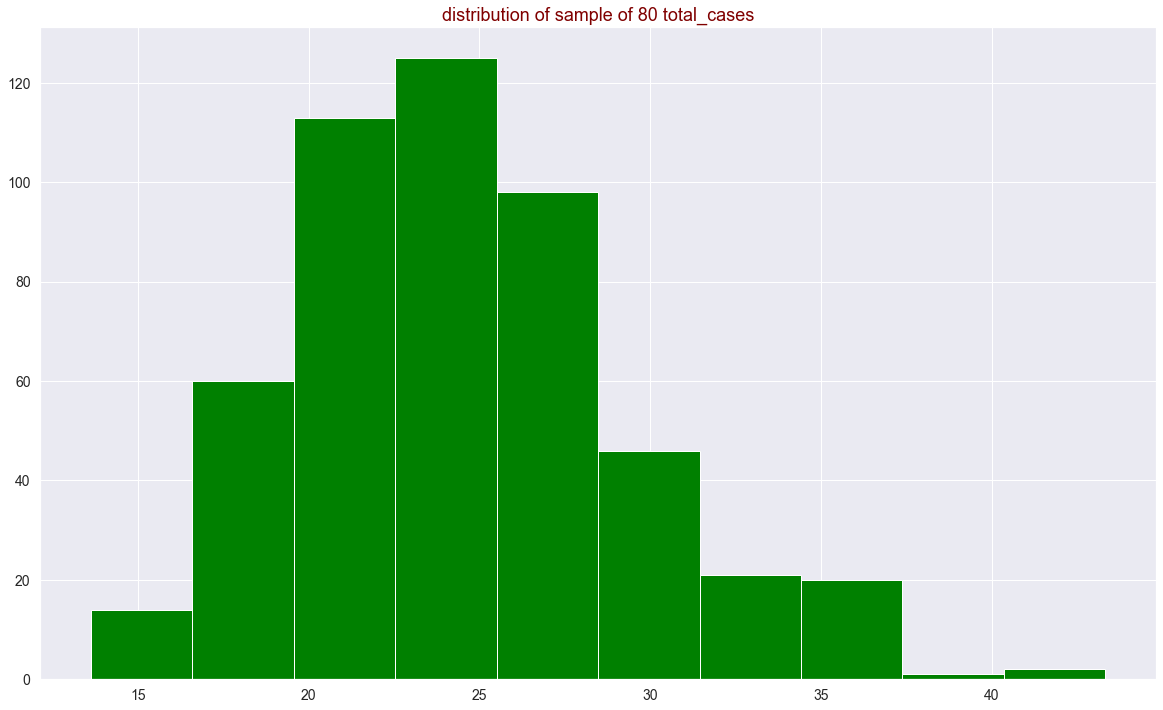

In [31]:
# seed the random number generator
random.seed(10)
# calculate the mean of 80 instances of total_cases 500 times

sample_80 = [(merged_train_labels.total_cases.sample(80).mean()) for _i in range(500)]

# plot the distribution of sample means
fig, ax = plt.subplots(figsize=(20,12))
plt.hist(sample_80,color="green")
plt.title("distribution of sample of 80 total_cases",fontsize= 18, color="maroon")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

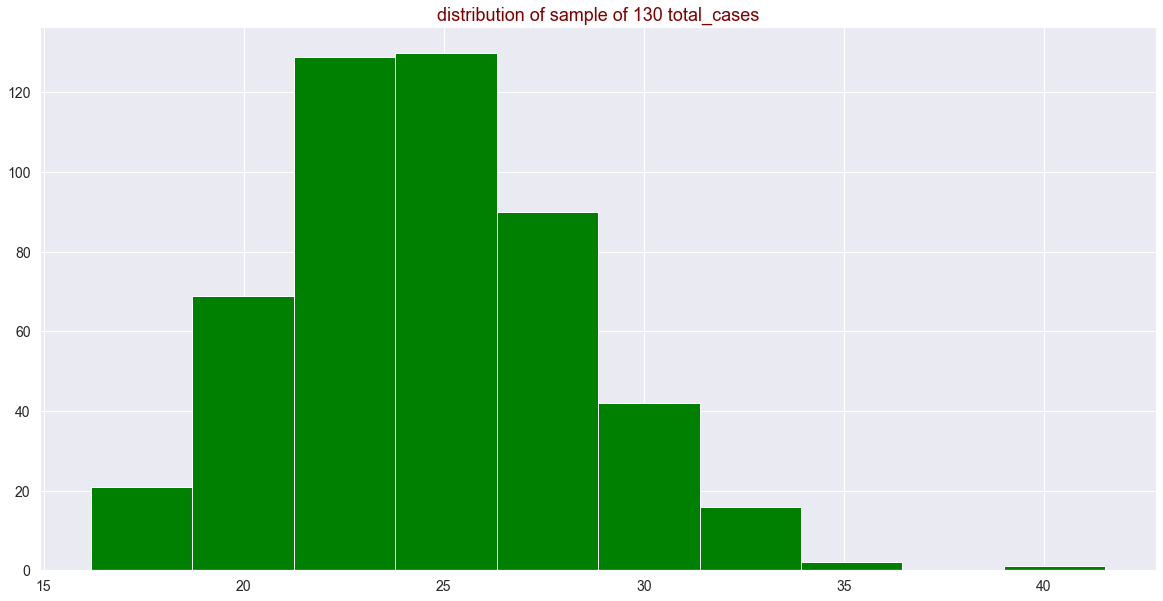

In [32]:
# seed the random number generator
random.seed(10)
# calculate the mean of 130 instances of total_cases 500 times

sample_130 = [(merged_train_labels.total_cases.sample(130).mean()) for _i in range(500)]

# plot the distribution of sample means
fig, ax = plt.subplots(figsize=(20,10))
plt.hist(sample_130,color="green")
plt.title("distribution of sample of 130 total_cases",fontsize= 18, color="maroon")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [33]:
print("The mean of total population:",merged_train_labels.total_cases.mean())
print("The standard deviation of total population:",merged_train_labels.total_cases.std())
print('The mean of the sample means of sample size 80: {}'.format(mean(sample_80)))
print('The standard deviation of the sample means of sample size 80: {}'.format(std(sample_80)))
print('The mean of the sample means of sample size 130: {}'.format(mean(sample_130)))
print('The standard deviation of the sample means of sample size 130: {}'.format(std(sample_130)))

The mean of total population: 24.67513736263736
The standard deviation of total population: 43.5960001631074
The mean of the sample means of sample size 80: 24.468524999999996
The standard deviation of the sample means of sample size 80: 4.800958850779186
The mean of the sample means of sample size 130: 24.558723076923076
The standard deviation of the sample means of sample size 130: 3.589122950373727


The analysis performed above is done on total cases by randomly taking two samples of size 80 and 130 from the total population. Below conditions were taken into account-
* Each sample represent random sample from the total population.
* The sample size is lesser than the 10% of the total population.
* The sample size is large enough that sample size is greater than 10.

As per the output above we see that as the sample size increases the sample mean tends to be normally distributed around the population mean and its standard deviation shrinks as the sample size increases.

**Hence it complies with the Central Limit Theorem**

Similary, the distribution can be checked for other attributes as well.

d). Find the mean, min, max and standard deviation of total_cases by city

In [34]:
#create a dataframe using group by city
grouped_df = merged_train_labels.groupby("city")
print(type(grouped_df))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [35]:
#mean of total_cases of dengue in both the city
grouped_df["total_cases"].mean()

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

In [36]:
#minimum value of total_cases of dengue in both the city
grouped_df["total_cases"].min()

city
iq    0
sj    0
Name: total_cases, dtype: int64

In [37]:
#maximum value of total_cases of dengue in both the city
grouped_df["total_cases"].max()

city
iq    116
sj    461
Name: total_cases, dtype: int64

In [38]:
#standard deviation for total_cases of dengue for both the city
grouped_df["total_cases"].std()

city
iq    10.765478
sj    51.381372
Name: total_cases, dtype: float64

In [39]:
grouped_df["total_cases"].median()

city
iq     5
sj    19
Name: total_cases, dtype: int64

2.e). Read the relationship between mean and standard deviation and  describe the data of total_cases by city

From the above analysis we can say that:
* The mean value of total_case for both the cities is more than its median which means that the distribution is positively skewed.
* Most of the data points lie in the range of +_10.8 around the mean of 7.6 for the city Iquitos.
* Most of the data points lie in the range of +_51 around the mean of 34 for the city San Juan.

Hence, we can say that there is more variation in San Juan total cases data points than Iquitos.

3. How many years in the city iq have greater than or equal to 50 total_cases of dengue and in which years?

In [40]:
#display the city iq having total_cases greater than 50.
year_count = merged_train_labels[(merged_train_labels["total_cases"] >= 50) & (merged_train_labels["city"] == "iq")]

In [41]:
year_count

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
1166,iq,2004,49,2004-12-02,0.201943,0.159367,0.159043,0.241086,53.01,299.177143,...,87.130000,53.01,18.110000,10.957143,27.90,11.00,34.1,22.4,64.0,83
1167,iq,2004,50,2004-12-09,0.323429,0.309514,0.275829,0.335900,70.04,297.787143,...,93.938571,70.04,18.207143,6.500000,27.90,11.00,34.1,22.4,9.9,116
1327,iq,2008,2,2008-01-08,0.444933,0.275850,0.356900,0.469729,71.84,296.095714,...,95.280000,71.84,16.681429,5.100000,25.80,6.30,31.4,22.6,104.4,58
1367,iq,2008,42,2008-10-14,0.288200,0.227857,0.280757,0.357971,69.39,298.350000,...,88.857143,69.39,17.527143,9.971429,26.45,9.10,34.7,21.0,24.9,63
1369,iq,2008,44,2008-10-28,0.161743,0.196200,0.198271,0.219614,43.60,298.372857,...,92.608571,43.60,18.484286,8.571429,27.40,11.35,35.0,21.2,0.0,50


In [42]:
#display the count and years for city iq having total_cases greater than 50.
year_count["total_cases"].count()

5

In [43]:
year_count["year"].unique()

array([2004, 2008], dtype=int64)

There are total 5 weeks in 2 years (2 weeks in 2004 and 3 weeks in 2008) for city Iquitos having total cases of dengue greater than or equal to 50.

#### Finding an outlier
4. Find and remove the outliers to bring the mean and standard deviation closer to each other.

In [44]:
from scipy import stats

In the below approach, z-scores have been calculated separately to indentify outliers from both the cities.

In [45]:
#calculating the z-score of total_cases for city iq
city_iq = merged_train_labels[merged_train_labels["city"] == "iq"]
print(city_iq["total_cases"].count())
print(city_iq["total_cases"].mean())
print(city_iq["total_cases"].std())

520
7.565384615384615
10.765478342208679


In [46]:
z_iq = np.abs(stats.zscore(city_iq["total_cases"])) 
threshold = 3
print(np.where(z_iq > 3))

(array([230, 231, 391, 429, 431, 432, 433], dtype=int64),)


In [47]:
print(z_iq[391])

4.689357839855926


For eg, The Z-score of 391th instance is 4.68 standard deviation away from mean i.e more than 3 standard deviation and so is considered as an outlier.

In [48]:
#removing the outliers from city iq
oulier_rem_city_iq = city_iq[(z_iq < 3)]
print(oulier_rem_city_iq.shape)

(513, 25)


In [49]:
#calculating the z-score of total_cases for city sj
city_sj = merged_train_labels[merged_train_labels["city"] == "sj"]
print(city_sj["total_cases"].count())
print(city_sj["total_cases"].mean())
print(city_sj["total_cases"].std())


936
34.18055555555556
51.38137249715158


In [50]:
z_sj = np.abs(stats.zscore(city_sj["total_cases"]))
threshold = 3
print(np.where(z_sj > 3))

(array([227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
       240, 428, 429, 430, 431, 432, 433], dtype=int64),)


In [51]:
print(z_sj[228])

4.630989307360045


For eg, The Z-score of 228th instance is 4.6 standard deviation away from mean i.e more than 3 standard deviation and so is considered as an outlier.

In [52]:
#removing the outliers from city sj
oulier_rem_city_sj = city_sj[(z_sj < 3)]
print(oulier_rem_city_sj.shape)

(916, 25)


Merge the dataframe having data point within 3 standard deviation for both the cities, i.e without outliers

In [53]:
#creating a new dataframe without outliers
df_without_outliers = pd.concat([oulier_rem_city_iq,oulier_rem_city_sj] )

In [54]:
df_without_outliers.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [55]:
print(merged_train_labels.shape)
print(df_without_outliers.shape)

(1456, 25)
(1429, 25)


From above analysis, we saw that there were 7 outliers for city Iquitos and 20 outliers for city San Juan, which were removed and now we have 1429 records left in our dataset.

In [56]:
print("mean of total_cases of original dataset:",merged_train_labels.total_cases.mean())
print("standard deviation of total_cases of original dataset:",merged_train_labels.total_cases.std())
print("mean of total_cases of new dataset with no outliers:",df_without_outliers.total_cases.mean())
print("standard deviation of total_cases of new dataset with no outliers:",df_without_outliers.total_cases.std())

mean of total_cases of original dataset: 24.67513736263736
standard deviation of total_cases of original dataset: 43.5960001631074
mean of total_cases of new dataset with no outliers: 20.46046186144157
standard deviation of total_cases of new dataset with no outliers: 25.821963922113625


According to above output, we see that on removing the ouliers standard deviation came closer to the mean.

5. Create a temp data frame by grouping the total_cases by weekofyear and draw a histogram of total_cases and provide insights based on the distribution.

In [57]:
#create a temp dataframe by grouping the total_cases by weekofyear 
temp = pd.DataFrame(df_without_outliers.groupby(["weekofyear"])["total_cases"].agg('sum'))

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text yticklabel objects>)

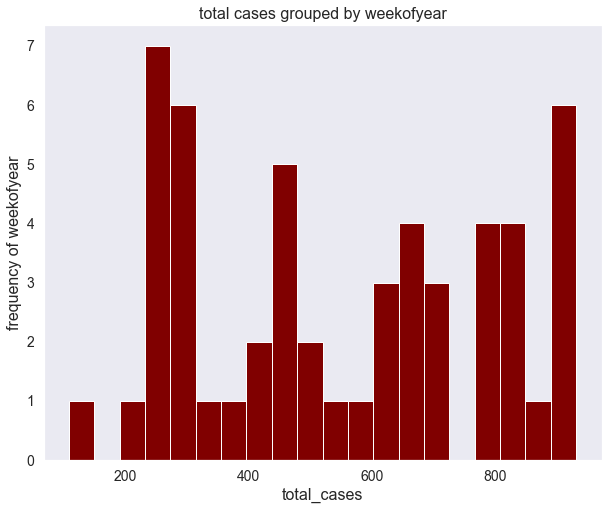

In [58]:
temp.hist(bins = 20,grid=False,color ="maroon", figsize=(10,8))
plt.xlabel("total_cases", fontsize=16)
plt.ylabel("frequency of weekofyear",fontsize=16)
plt.title("total cases grouped by weekofyear",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

From the above output, we can say that
* There are 7 + 6 = 13 particular weeks of several years in the dataset when the sum of total cases of dengue is between 250 and 350.
* There are 2 empty bins indicating that there were no weeks 
 * when the sum of total cases were around 750 and lesser than 800 and 
 * when the sum of total cases is some around below 200 and above 150.
* There are 6 weeks having sum of total cases of dengue around 900.